# Exploring Data Pathologies in Conjoint Studies

*The effect of pathological behavior on HBMNL models*

In [30]:
from PYTHON import utils
from PYTHON import stan_utility
import matplotlib.pyplot as plt
import pystan
import numpy as np
%matplotlib inline

plt.style.use("./analysis.mplstyle")

In [62]:
import importlib
importlib.reload(utils)

<module 'PYTHON.utils' from '/Users/derekmiller/repos/clever-randomization/PYTHON/utils.py'>

*generate data and build models*

In [32]:
# initialize dictionaries to store the various models, data, and fit objects
DATA = dict()
MODEL = dict()
FIT = dict()

In [33]:
pathology_list = ['Stan', 'none', 'ANA', 'ANA_random', 'ANA_systematic', 'screening', 'screening_random']

model_list = ['mnl_vanilla', 'mnl_leakyrelu', 'mnl_fhorseshoe']

# generate data
for p in pathology_list:
    if p == 'Stan':
        DATA[p] = utils.generate_simulated_data(use_stan=True)
    else:
        DATA[p] = utils.generate_simulated_data(pathology_type=p)

# get models
for m in model_list:
    MODEL[m] = utils.get_model(model_name=m)

## Results

In [34]:
DATA['Stan']['Y'].shape

(100, 10)

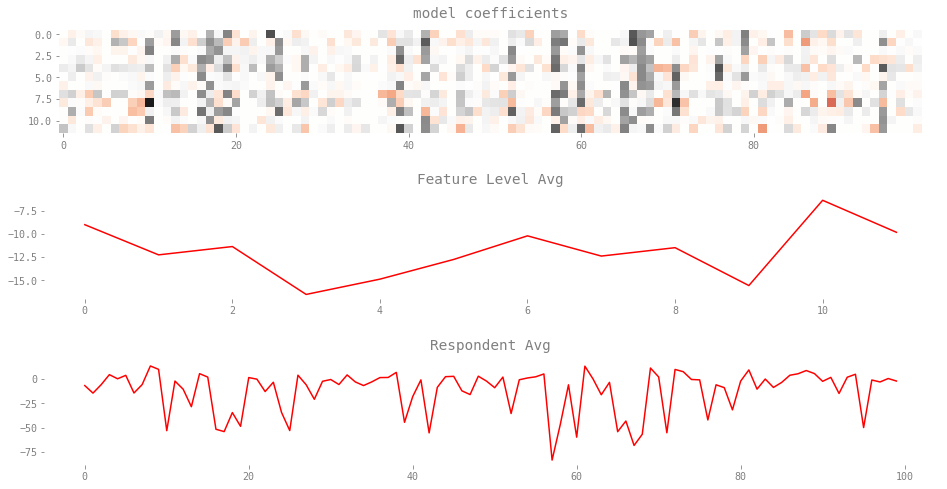

In [63]:
utils.plot_betas(DATA['Stan']['B'])

In [35]:
# fit model
m = 'mnl_vanilla'
d = 'Stan'
f = m + "|" + d

FIT[f] = MODEL[m].sampling(DATA[d], control={'adapt_delta':.9})

Results for fit mnl_vanilla|Stan


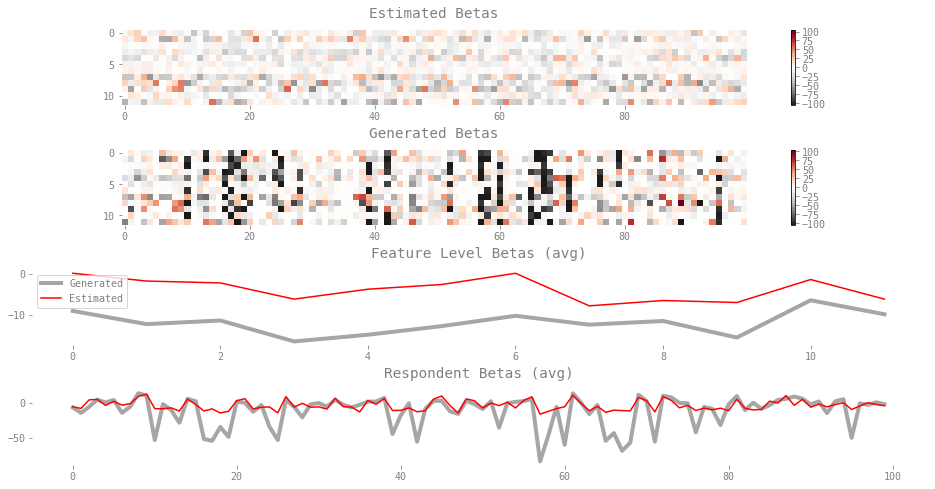

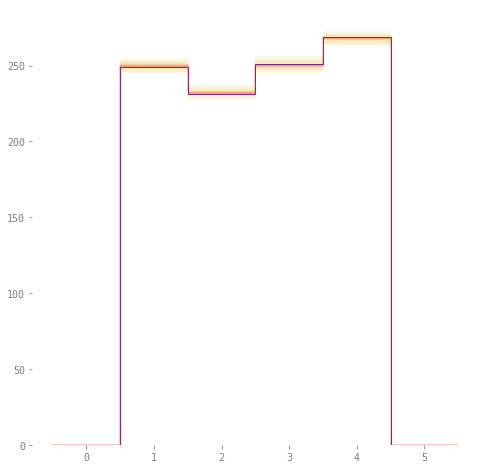

In [45]:
# plot results
print("Results for fit {0}".format(f))
utils.plot_betas(DATA[d], FIT[f])
utils.plot_ppc(DATA[d], FIT[f])

In [41]:
stan_utility.check_all_diagnostics(FIT[f])

n_eff / iter looks reasonable for all parameters
Rhat for parameter L_Omega[1,1] is nan!
Rhat for parameter L_Omega[1,2] is nan!
Rhat for parameter L_Omega[1,3] is nan!
Rhat for parameter L_Omega[2,3] is nan!
Rhat for parameter L_Omega[1,4] is nan!
Rhat for parameter L_Omega[2,4] is nan!
Rhat for parameter L_Omega[3,4] is nan!
Rhat for parameter L_Omega[1,5] is nan!
Rhat for parameter L_Omega[2,5] is nan!
Rhat for parameter L_Omega[3,5] is nan!
Rhat for parameter L_Omega[4,5] is nan!
Rhat for parameter L_Omega[1,6] is nan!
Rhat for parameter L_Omega[2,6] is nan!
Rhat for parameter L_Omega[3,6] is nan!
Rhat for parameter L_Omega[4,6] is nan!
Rhat for parameter L_Omega[5,6] is nan!
Rhat for parameter L_Omega[1,7] is nan!
Rhat for parameter L_Omega[2,7] is nan!
Rhat for parameter L_Omega[3,7] is nan!
Rhat for parameter L_Omega[4,7] is nan!
Rhat for parameter L_Omega[5,7] is nan!
Rhat for parameter L_Omega[6,7] is nan!
Rhat for parameter L_Omega[1,8] is nan!
Rhat for parameter L_Omega[2,8]

In [46]:
# fit model
m = 'mnl_fhorseshoe'
d = 'Stan'
f = m + "|" + d

FIT[f] = MODEL[m].sampling(DATA[d], control={'adapt_delta':.9})

Results for fit mnl_fhorseshoe|Stan


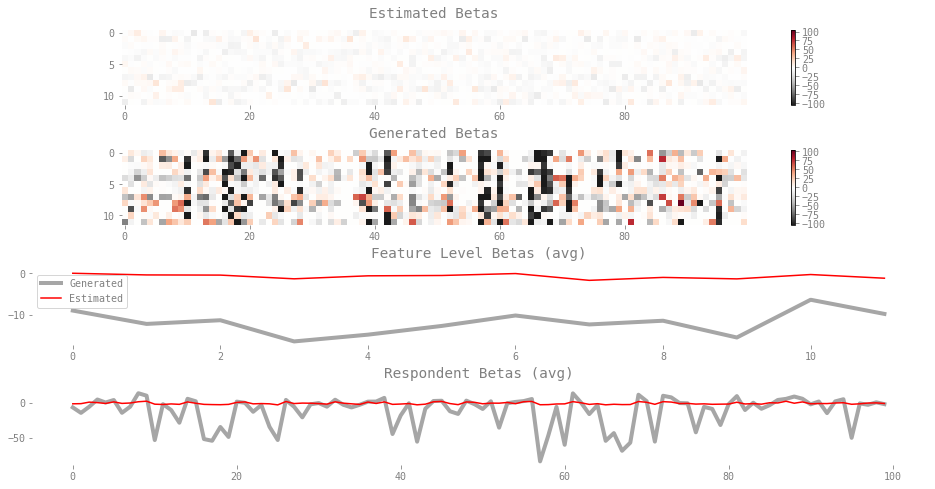

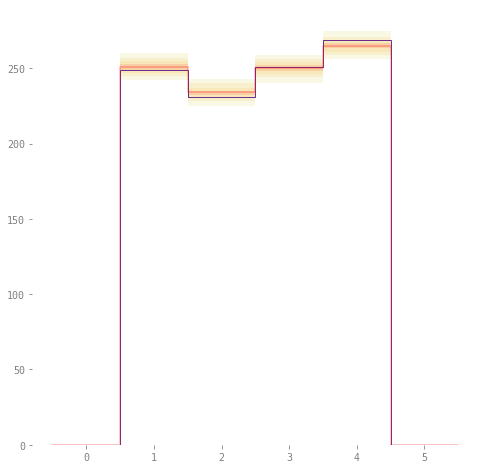

In [49]:
# plot results
print("Results for fit {0}".format(f))
utils.plot_betas(DATA[d], FIT[f])
utils.plot_ppc(DATA[d], FIT[f])

In [50]:
stan_utility.check_all_diagnostics(FIT[f])

n_eff / iter looks reasonable for all parameters
Rhat looks reasonable for all parameters
0.0 of 4000 iterations ended with a divergence (0.0%)
0 of 4000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior


In [52]:
# fit model
m = 'mnl_leakyrelu'
d = 'Stan'
f = m + "|" + d

FIT[f] = MODEL[m].sampling(DATA[d], control={'adapt_delta':.9})

Results for fit mnl_leakyrelu|Stan


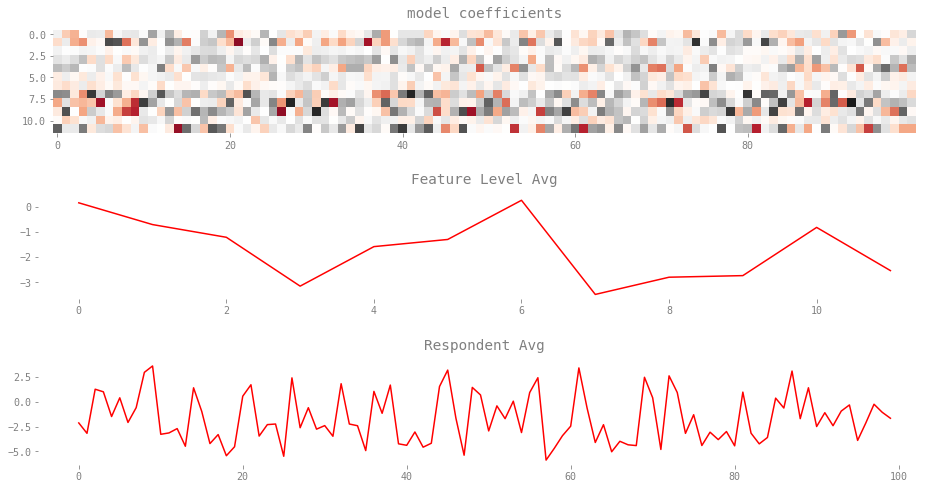

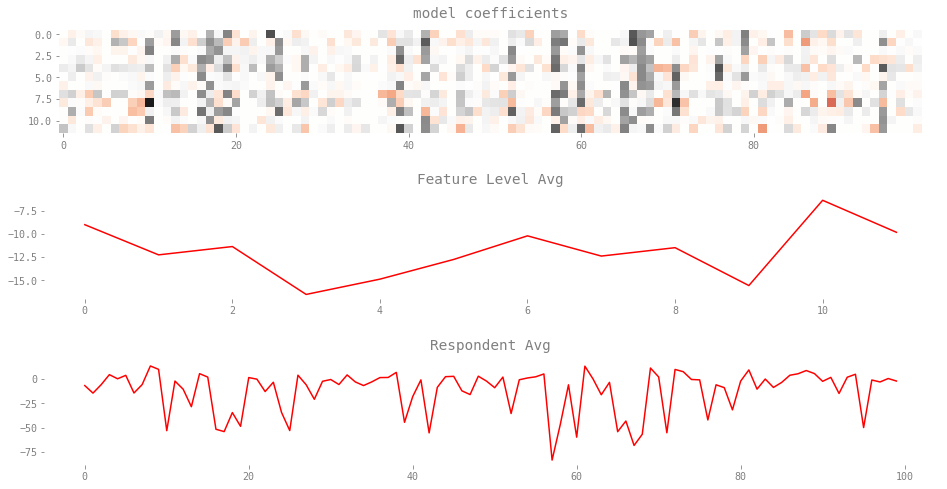

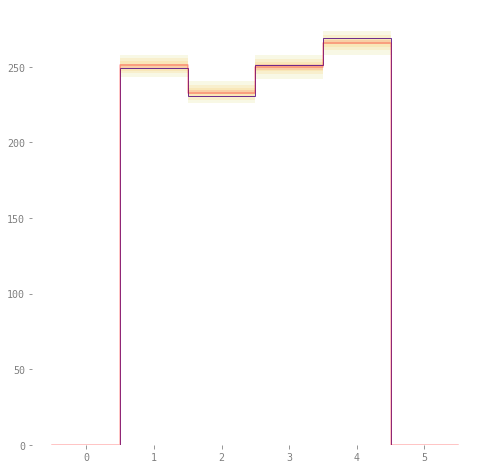

In [67]:
# plot results
print("Results for fit {0}".format(f))
utils.plot_betas(FIT[f].extract(pars=['B'])['B'].mean(axis=0).T)
utils.plot_betas(DATA[d]['B'])

utils.plot_ppc(DATA[d], FIT[f])

In [55]:
stan_utility.check_all_diagnostics(FIT[f])

n_eff / iter looks reasonable for all parameters
Rhat for parameter L_Omega[1,1] is nan!
Rhat for parameter L_Omega[1,2] is nan!
Rhat for parameter L_Omega[1,3] is nan!
Rhat for parameter L_Omega[2,3] is nan!
Rhat for parameter L_Omega[1,4] is nan!
Rhat for parameter L_Omega[2,4] is nan!
Rhat for parameter L_Omega[3,4] is nan!
Rhat for parameter L_Omega[1,5] is nan!
Rhat for parameter L_Omega[2,5] is nan!
Rhat for parameter L_Omega[3,5] is nan!
Rhat for parameter L_Omega[4,5] is nan!
Rhat for parameter L_Omega[1,6] is nan!
Rhat for parameter L_Omega[2,6] is nan!
Rhat for parameter L_Omega[3,6] is nan!
Rhat for parameter L_Omega[4,6] is nan!
Rhat for parameter L_Omega[5,6] is nan!
Rhat for parameter L_Omega[1,7] is nan!
Rhat for parameter L_Omega[2,7] is nan!
Rhat for parameter L_Omega[3,7] is nan!
Rhat for parameter L_Omega[4,7] is nan!
Rhat for parameter L_Omega[5,7] is nan!
Rhat for parameter L_Omega[6,7] is nan!
Rhat for parameter L_Omega[1,8] is nan!
Rhat for parameter L_Omega[2,8]

In [68]:
log_lik_vanilla = FIT['mnl_vanilla|Stan'].extract(pars=['log_lik'])['log_lik']
log_lik_fhorseshoe = FIT['mnl_fhorseshoe|Stan'].extract(pars=['log_lik'])['log_lik']
log_lik_leakyrelu = FIT['mnl_leakyrelu|Stan'].extract(pars=['log_lik'])['log_lik']

In [69]:
LL = {'LL1':log_lik_vanilla,'LL2':log_lik_fhorseshoe,'LL3':log_lik_leakyrelu}

In [ ]:
#pystan.misc.stan_rdump(LL, './STAN/logliklist')
ll1 = log_lik_vanilla.tolist()